<a href="https://colab.research.google.com/github/likhith-kumarn/Bot/blob/main/logisticreggesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/diabetes (4).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.shape


(768, 9)

In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.isnull().any()


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


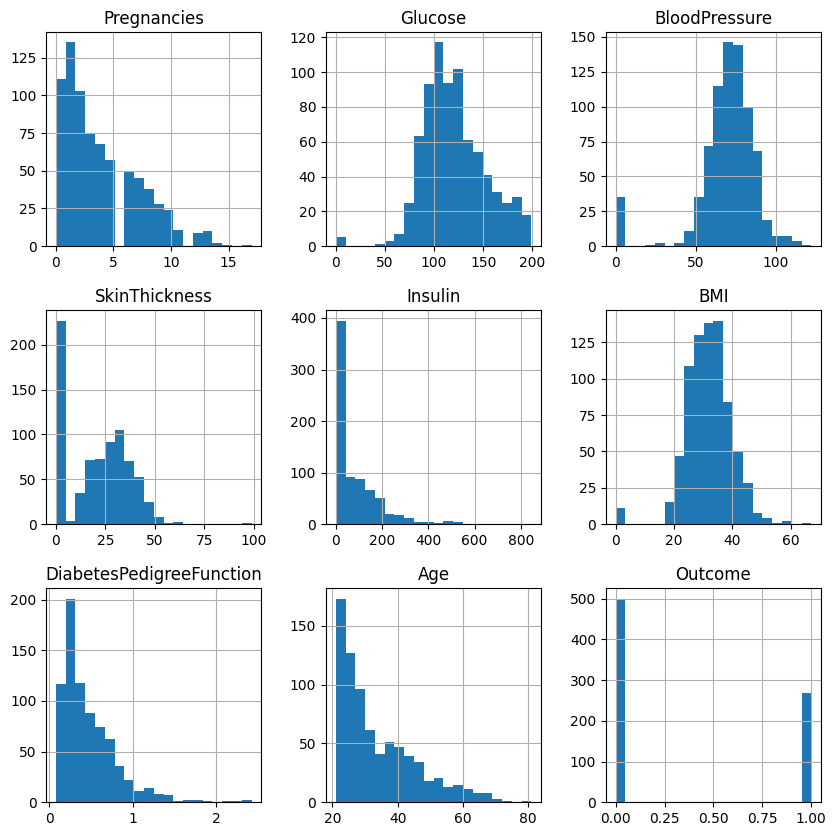

In [ ]:
df.hist(bins=20, figsize=(10,10))
plt.show()


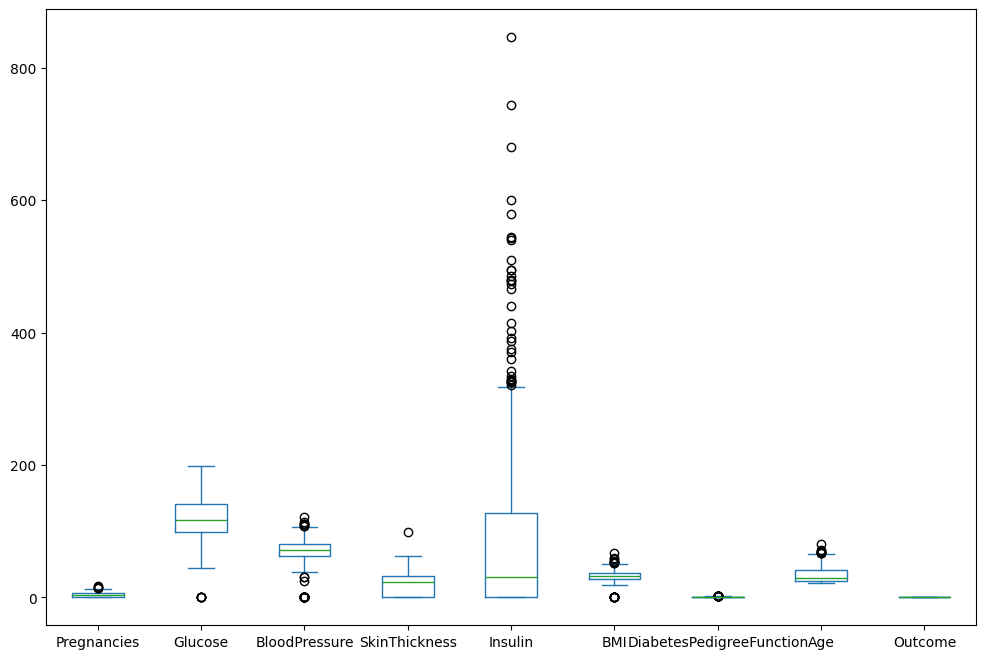

In [ ]:
df.plot(kind="box",figsize=(12,8))
plt.show()


In [ ]:
correlation = df.corr(numeric_only=True)
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

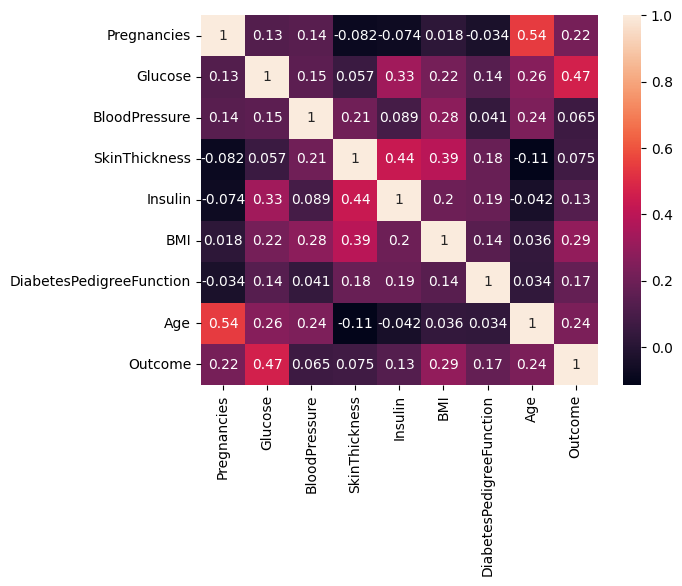

In [ ]:
sns.heatmap(correlation, annot=True)

In [ ]:
# Feature Extraction

x=df.iloc[:,0:8]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y=df["Outcome"]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
# Scaling the numerical features

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(x)


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(x_train)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [ ]:
model1=LogisticRegression()
model1.fit(x_test,y_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1=model1.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_train,y_pred)


0.7703583061889251

In [ ]:
confusion_matrix(y_train,y_pred)


array([[353,  48],
       [ 93, 120]])

In [ ]:
classification_report(y_train,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83       401\n           1       0.71      0.56      0.63       213\n\n    accuracy                           0.77       614\n   macro avg       0.75      0.72      0.73       614\nweighted avg       0.76      0.77      0.76       614\n'

In [ ]:
accuracy_score(y_test,y_pred1)


0.8246753246753247

In [ ]:
confusion_matrix(y_test,y_pred1)


array([[89, 10],
       [17, 38]])

In [ ]:
classification_report(y_test,y_pred1)


'              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87        99\n           1       0.79      0.69      0.74        55\n\n    accuracy                           0.82       154\n   macro avg       0.82      0.79      0.80       154\nweighted avg       0.82      0.82      0.82       154\n'

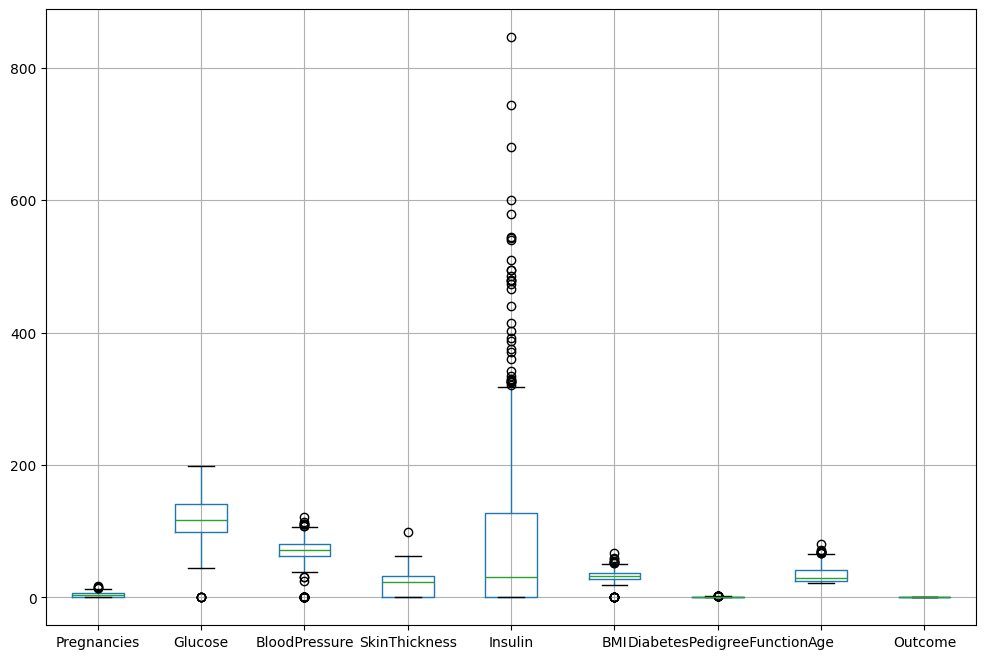

In [ ]:
df.boxplot(figsize=(12,8))
plt.show()


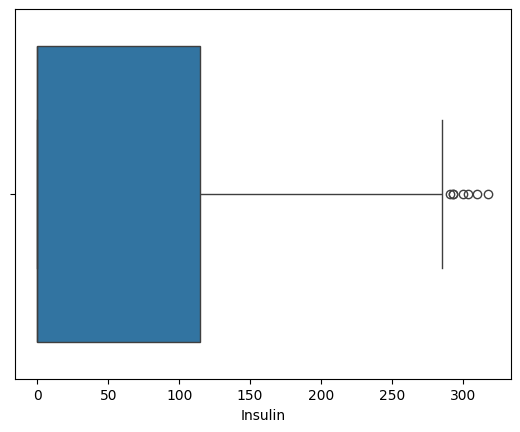

In [ ]:
Q1=df['Insulin'].quantile(0.25)
Q3=df['Insulin'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['Insulin']>=(Q1-1.5*IQR)) & (df['Insulin']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['Insulin'])
plt.show()


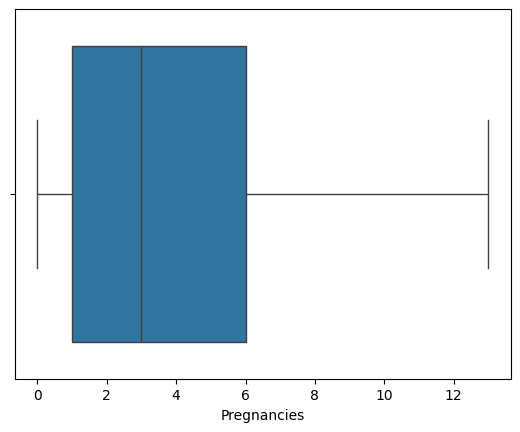

In [ ]:
Q1=df['Pregnancies'].quantile(0.25)
Q3=df['Pregnancies'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['Pregnancies']>=(Q1-1.5*IQR)) & (df['Pregnancies']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['Pregnancies'])
plt.show()


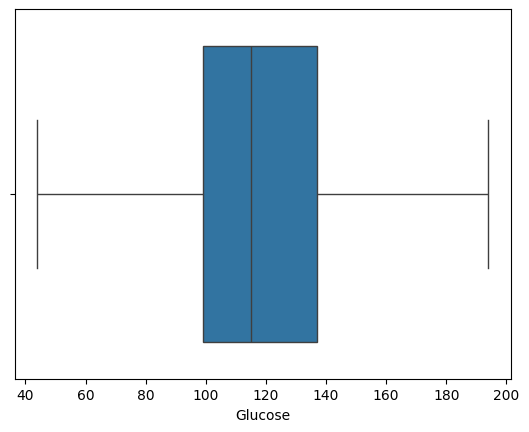

In [ ]:
Q1=df['Glucose'].quantile(0.25)
Q3=df['Glucose'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['Glucose']>=(Q1-1.5*IQR)) & (df['Glucose']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['Glucose'])
plt.show()


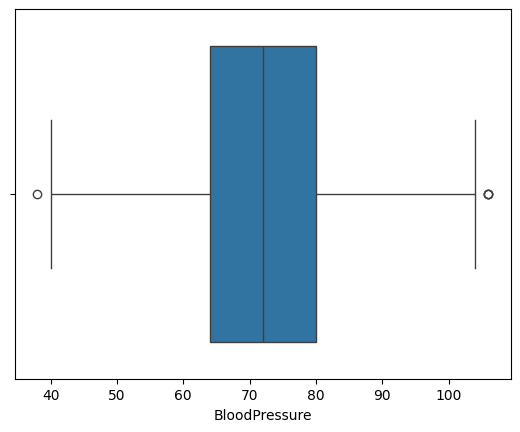

In [ ]:
Q1=df['BloodPressure'].quantile(0.25)
Q3=df['BloodPressure'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['BloodPressure']>=(Q1-1.5*IQR)) & (df['BloodPressure']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['BloodPressure'])
plt.show()


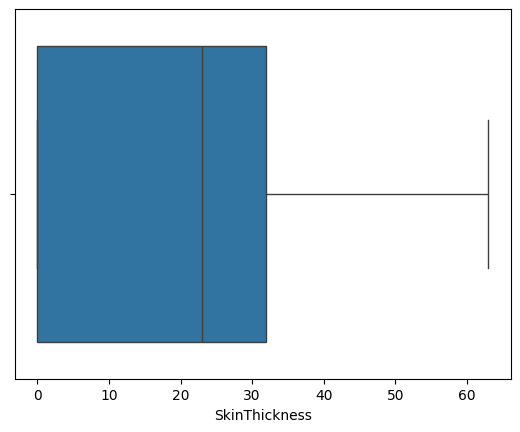

In [ ]:
Q1=df['SkinThickness'].quantile(0.25)
Q3=df['SkinThickness'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['SkinThickness']>=(Q1-1.5*IQR)) & (df['SkinThickness']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['SkinThickness'])
plt.show()


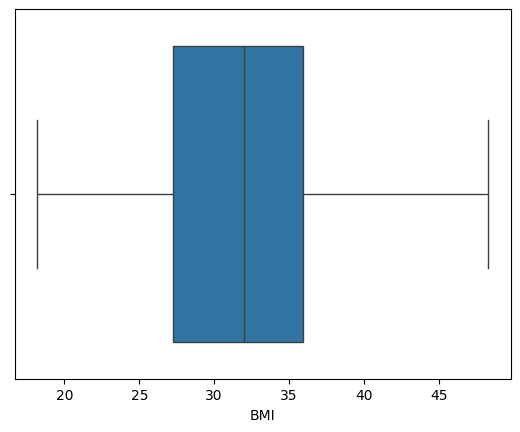

In [ ]:
Q1=df['BMI'].quantile(0.25)
Q3=df['BMI'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['BMI']>=(Q1-1.5*IQR)) & (df['BMI']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['BMI'])
plt.show()


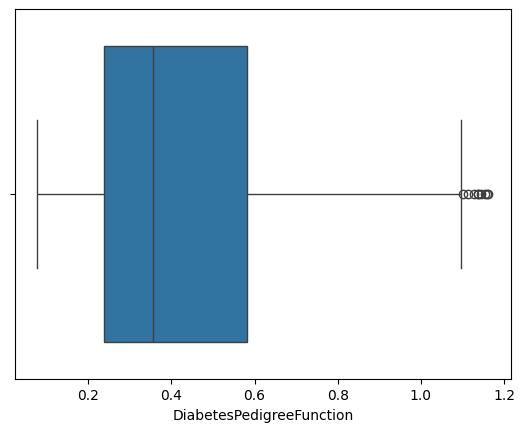

In [ ]:
Q1=df['DiabetesPedigreeFunction'].quantile(0.25)
Q3=df['DiabetesPedigreeFunction'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['DiabetesPedigreeFunction']>=(Q1-1.5*IQR)) & (df['DiabetesPedigreeFunction']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()


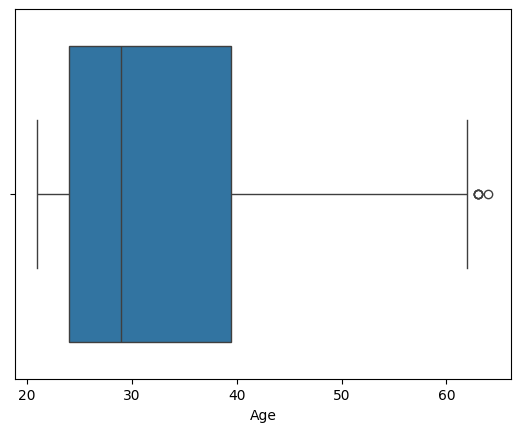

In [ ]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

df=df[(df['Age']>=(Q1-1.5*IQR)) & (df['Age']<=(Q3+1.5*IQR))]

sns.boxplot(x=df['Age'])
plt.show()


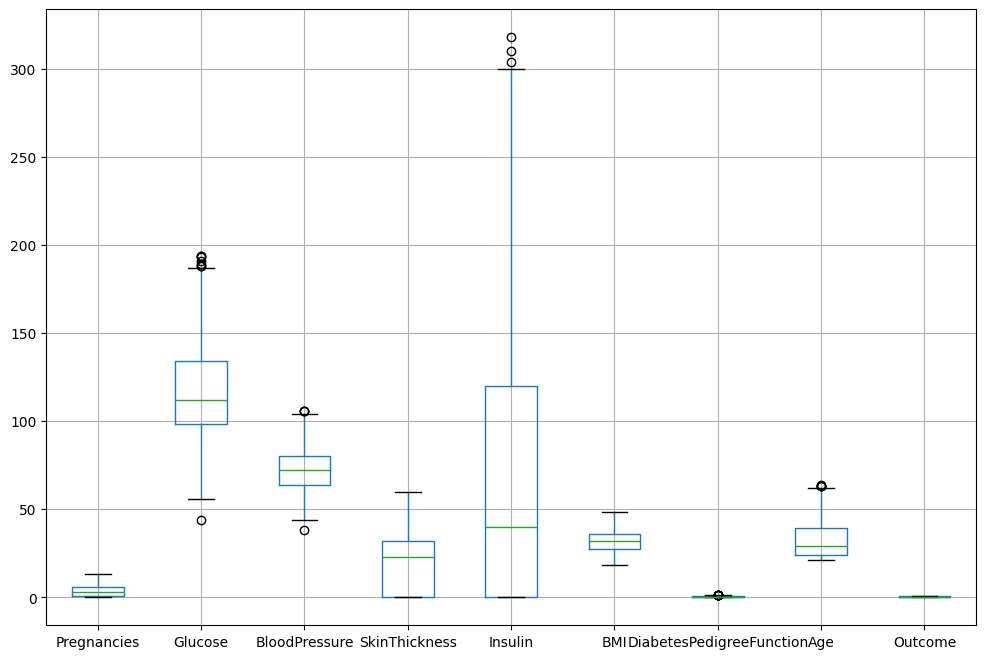

In [ ]:
# boxplot after treating the outliers

df.boxplot(figsize=(12,8))
plt.show()


In [ ]:
x=df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
y=df["Outcome"]
y


,Outcome
0,1
1,0
2,1
3,0
5,0
...,...
763,0
764,0
765,0
766,1


In [ ]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()
x=model.fit_transform(x)
x

array([[ 0.68716715,  1.0907505 ,  0.00988419, ...,  0.27289739,
         0.8232339 ,  1.66040757],
       [-0.85397947, -1.16747828, -0.52214306, ..., -0.83687681,
        -0.30175168, -0.12428019],
       [ 1.3036258 ,  2.34532205, -0.69948547, ..., -1.36005607,
         1.00665546, -0.03034925],
       ...,
       [ 0.37893783,  0.12293817,  0.00988419, ..., -0.90029247,
        -0.73381136, -0.21821112],
       [-0.85397947,  0.30216267, -1.0541703 , ..., -0.28198971,
        -0.30990375,  1.37861477],
       [-0.85397947, -0.88071907, -0.16745823, ..., -0.23442795,
        -0.44848893, -0.87572767]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_pred)
score

0.7741935483870968

In [ ]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[78,  8],
       [20, 18]])

In [ ]:
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           0       0.80      0.91      0.85        86\n           1       0.69      0.47      0.56        38\n\n    accuracy                           0.77       124\n   macro avg       0.74      0.69      0.71       124\nweighted avg       0.76      0.77      0.76       124\n'

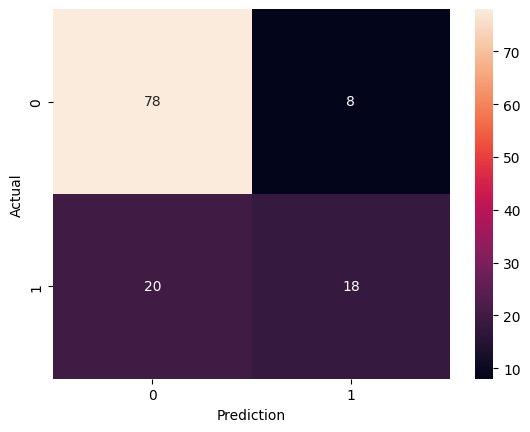

In [ ]:
sns.heatmap(confusion,annot=True)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()